### Installing Dependencies

In [1]:
!pip install opencv-python

     ---------------------------------------- 39.5/39.5 MB 2.2 MB/s eta 0:00:00


In [2]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

### Function to convert image to different formats

In [10]:
def colored_sketch(img):
    return cv2.stylization(img, sigma_s=60, sigma_r=0.6)


In [11]:
def edge_sketch(img):
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(grey_img, 50, 150)  # Adjust thresholds for different edge details
    return edges

In [12]:
def cartoonify(img):
    # Convert to grayscale
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply median blur
    blur_img = cv2.medianBlur(grey_img, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(blur_img, 255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter for smoothing colors
    color_img = cv2.bilateralFilter(img, d=9, sigmaColor=300, sigmaSpace=300)

    # Combine edges with color image
    cartoon = cv2.bitwise_and(color_img, color_img, mask=edges)
    
    return cartoon


In [15]:
def adjustable_sketch(img, blur_ksize=111):
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    invert_img = cv2.bitwise_not(grey_img)
    blur_img = cv2.GaussianBlur(invert_img, (blur_ksize, blur_ksize), 0)
    invblur_img = cv2.bitwise_not(blur_img)
    sketch_img = cv2.divide(grey_img, invblur_img, scale=256.0)
    return sketch_img


### Function to display image with optional title

In [4]:
def display_image(image, title=None):
    plt.imshow(image, cmap='gray')
    plt.axis(False)
    if title:
        plt.title(title)
    plt.show()

### Main point to select image and generate different formats

Choose Sketch Style:
1 - Pencil Sketch (B/W)
2 - Colored Sketch
3 - Edge-Detection Sketch
4 - Cartoon Effect


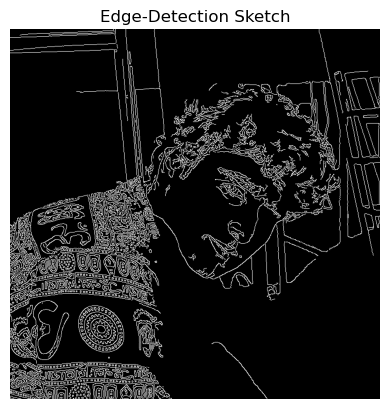

Sketch saved as D:/Me/Projects/SketchiFy-master/Examples/Orignal_style3.png


In [19]:
# File picker
Tk().withdraw()
image_path = askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
img = cv2.imread(image_path)

# Convert BGR to RGB for displaying
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Select Sketch Style
print("Choose Sketch Style:")
print("1 - Pencil Sketch (B/W)")
print("2 - Colored Sketch")
print("3 - Edge-Detection Sketch")
print("4 - Cartoon Effect")
choice = int(input("Enter your choice (1-4): "))

if choice == 1:
    sketch_img = adjustable_sketch(img)
    display_image(sketch_img, "Pencil Sketch")
elif choice == 2:
    sketch_img = colored_sketch(img)
    display_image(sketch_img, "Colored Sketch")
elif choice == 3:
    sketch_img = edge_sketch(img)
    display_image(sketch_img, "Edge-Detection Sketch")
elif choice == 4:
    sketch_img = cartoonify(img)
    display_image(sketch_img, "Cartoon Effect")
else:
    print("Invalid choice. Defaulting to Pencil Sketch.")
    sketch_img = adjustable_sketch(img)
    display_image(sketch_img, "Pencil Sketch")

# Save the result
output_path = image_path.replace(".", f"_style{choice}.")
cv2.imwrite(output_path, sketch_img)
print(f"Sketch saved as {output_path}")
